In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp # scipy expands on numpy with additional functionality for scientific computing

In [ ]:
# 1.1 (anharmonic hamiltonian in harmonic eigenbasis)
def anharmonic_oscillator(lam, N_t): # N_t: truncation size, lam: coefficient of anharmonic term x^4 (h_bar, m, omega = 1)
    # use masking instead of loops over i,j with kroncker deltas to build raising/lowering operators
    I, J = np.indices((N_t, N_t)) # np.indices returns a tuple of arrays I, J with shape (N_t, N_t) representing the indices of a grid (I[i,j] = i, J[i,j] = j)
    mask_1 = (I == J + 1)   # boolean array; mask_1[i,j] is True iff i == j+1 (subdiagonal), else False
    mask_2 = (I == J - 1)   # boolean array; mask_2[i,j] is True iff i == j-1 (superdiagonal), else False
    a_dag = np.where(mask_1, np.sqrt(I), 0.0)  # (a_dag)_{i,j} = sqrt(i) if i == j+1, else 0
    a = np.where(mask_2, np.sqrt(J), 0.0)  #  a_{i,j}  = sqrt(j) if i == j-1, else 0
    x = np.sqrt(1/2)* (a_dag + a) # position operator x in terms of a and a_dag
    p = np.sqrt(1/2)*1j* (a_dag - a) # momentum operator p in terms of a and a_dag (j = imaginary unit)
    N = a_dag @ a # number operator N = a_dag @ a (@ = matrix multiplication, * = element-wise multiplication)
    H = N + (1/2) * np.identity(N_t) + lam*(np.linalg.matrix_power(x, 4)) # Hamiltonian H = N + 1/2 + lam*x^4
    return H, x, p

lam = 1
N_t = 10

H = anharmonic_oscillator(lam, N_t)[0]
rounded_H = np.round(H, 3)
print("Anharmonic Hamiltonian (lam=1, N_t=10):\n", rounded_H)

Anharmonic Hamiltonian (lam=1, N_t=10):
 [[ 1.25   0.     2.121  0.     1.225  0.     0.     0.     0.     0.   ]
 [ 0.     5.25   0.     6.124  0.     2.739  0.     0.     0.     0.   ]
 [ 2.121  0.    12.25   0.    12.124  0.     4.743  0.     0.     0.   ]
 [ 0.     6.124  0.    22.25   0.    20.125  0.     7.246  0.     0.   ]
 [ 1.225  0.    12.124  0.    35.25   0.    30.125  0.    10.247  0.   ]
 [ 0.     2.739  0.    20.125  0.    51.25   0.    42.125  0.    13.748]
 [ 0.     0.     4.743  0.    30.125  0.    70.25   0.    56.125  0.   ]
 [ 0.     0.     0.     7.246  0.    42.125  0.    92.25   0.    50.912]
 [ 0.     0.     0.     0.    10.247  0.    56.125  0.    94.75   0.   ]
 [ 0.     0.     0.     0.     0.    13.748  0.    50.912  0.    47.75 ]]


'At lambda = 0, the eigenvalues remain constant for all N_t because they are the exact eigenvalues of the quantum harmonic oscillator. However, as lambda increases, the eigenvalues are no longer constant with respect to N_t. They oscillate and converge more slowly, indicating that a larger truncation size is needed to accurately capture the effects of the anharmonic term in the Hamiltonian. The value that the eigenvalues converge to also increases with larger lambda, reflecting the increased energy levels due to the anharmonicity. The higher energy levels (higher k) tend to converge more slowly than the lower ones, especially at larger lambda values because they are more affected by the anharmonic term.'

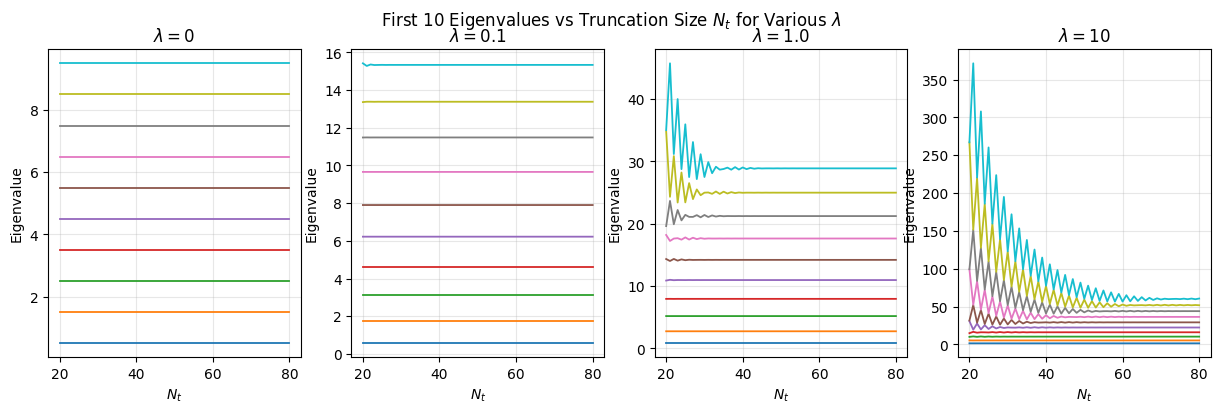

In [4]:
# 1.2 (eigenvalues of anharmonic hamiltonian)
def get_k_eig(lam, N_t, k): # return first k eigenvalues and corresponding eigenvectors of anharmonic hamiltonian for given lam and N_t
    H = anharmonic_oscillator(lam, N_t)[0]
    eigvals, eigvecs = sp.linalg.eigh(H)  # eigvals = array of eigenvalues, eigvecs = column matrix with corresponding normalized eigenvectors
    return eigvals[:k], eigvecs[:,:k] # return first k eigenvalues and corresponding eigenvectors

lams = [0, 0.1, 1.0, 10]
N_ts = np.arange(20,81)
k = 10
fig, axs = plt.subplots(1, len(lams), figsize=(15,4)) # fig = whole figure, axs = 1 x len(lam_list) array of empty subplots (15x4 inches)
fig.suptitle(f"First {k} Eigenvalues vs Truncation Size $N_t$ for Various $\lambda$") # overall title for figure
for idx, lam in enumerate(lams): # enumerate(lam_list) gives (index, value) pairs (i.e. 0, 0), (1, 0.1), (2, 1.0), ...
    eig_arr = np.zeros(shape = (k, len(N_ts))) # array to hold first k eigenvalues for each N_t
    for col, N_t in enumerate(N_ts): # enumerate(N_ts) gives (index, value) pairs (i.e. 0, 20), (1, 21), ...)
        eigvals, eigvecs = get_k_eig(lam, N_t, k)
        eig_arr[:, col] = eigvals # store eigenvalues in column corresponding to N_t
    axs[idx].plot(N_ts, eig_arr.T, lw=1.3) # plot each eigenvalue (rows of eig_arr) vs N_t for idx'th subplot
    axs[idx].set_title(rf"$\lambda={lam}$") # latex formatting with raw string (rf"")
    axs[idx].set_xlabel(r"$N_t$")
    axs[idx].set_ylabel("Eigenvalue")
    axs[idx].grid(alpha=0.3) # alpha sets transparency of grid lines

'At lambda = 0, the eigenvalues remain constant for all N_t because they are the exact eigenvalues of the quantum harmonic oscillator. However, as lambda increases, the eigenvalues are no longer constant with respect to N_t. They oscillate and converge more slowly, indicating that a larger truncation size is needed to accurately capture the effects of the anharmonic term in the Hamiltonian. The value that the eigenvalues converge to also increases with larger lambda, reflecting the increased energy levels due to the anharmonicity. The higher energy levels (higher k) tend to converge more slowly than the lower ones, especially at larger lambda values because they are more affected by the anharmonic term.'


Fitted line: ln(E_0) ~ 0.282983 * ln(lambda) + -0.218830
Thus, for large lambda, the ground state energy scales as E_0 ~ (lambda^0.282983) (power law relationship).


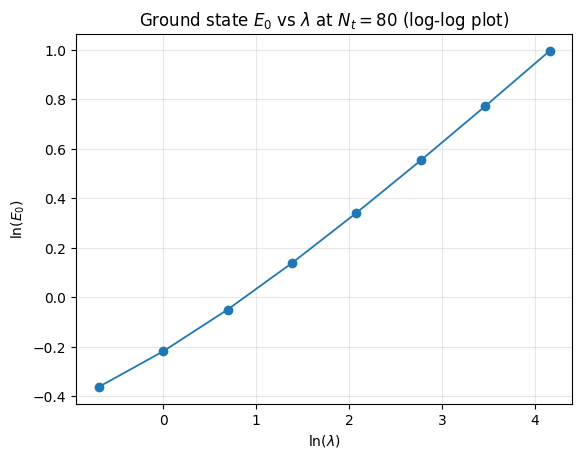

In [5]:
# 1.3 (ground state energy vs lambda)
lams = np.array([0.5*2**n for n in range(8)]) # lambda values: 0.5, 1, 2, 4, 8, 16, 32, 64
N_t = 80
k = 1

E_0s = [get_k_eig(lam, N_t, k)[0][0] for lam in lams] # list of ground state energies for each lambda
log_lams = np.log(lams)
log_E_0s = np.log(E_0s)
plt.plot(log_lams, log_E_0s, '-o', lw=1.3) # plot ln(E_0) vs ln(lambda), roughly linear for large lambda
plt.xlabel(r"$ \ln(\lambda$)")
plt.ylabel(r"$\ln(E_0$)")
plt.title(r"Ground state $E_0$ vs $\lambda$ at $N_t=80$ (log-log plot)")
plt.grid(alpha=0.3)

c_1 = np.polyfit(log_lams, log_E_0s, 1) # fit polynomial of degree 1 (line) to ln(E_0s) = c_1[0]*ln(lams) + c_1[1] 
print(f"Fitted line: ln(E_0) ~ {c_1[0]:.6f} * ln(lambda) + {c_1[1]:.6f}")
print(f"Thus, for large lambda, the ground state energy scales as E_0 ~ (lambda^{c_1[0]:.6f}) (power law relationship).")

'The product of the uncertainties Δx and Δp remains well above the Heisenberg limit of 1/2 for all values of λ, confirming the validity of the uncertainty principle in this anharmonic oscillator system.'

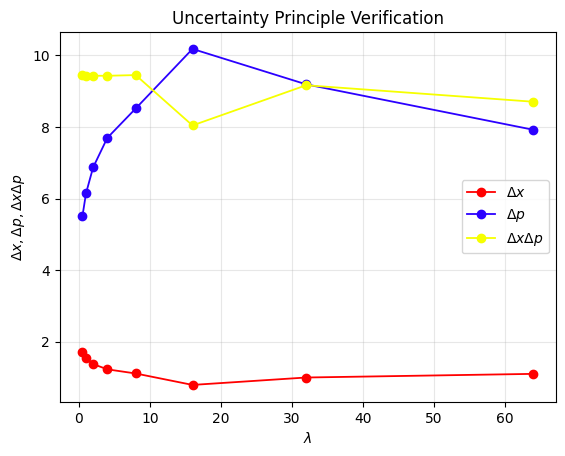

In [38]:
#1.4 (verify uncertainty principle)
k = 10
N_t = 80
std_xs = []
std_ps = [] 
for lam in lams:
    eigvalues, eigvectors = get_k_eig(lam, N_t, k)
    k_eigvalue, k_eigvector = eigvalues[-1], eigvectors[:,-1] # get k'th eigenvalue and corresponding eigenvector
    x, p = anharmonic_oscillator(lam, N_t)[1:]
    exp_xsq = (k_eigvector.conj().T) @ (x@x) @ k_eigvector # expectation value of x^2 = <psi|x^2|psi> (similarly for p^2)
    exp_psq = (k_eigvector.conj().T) @ (p@p) @ k_eigvector
    std_x = np.sqrt(exp_xsq) # standard deviation delta_x = sqrt(<x^2> - <x>^2), but <x> = 0 by symmetry (similarly for p)
    std_p = np.sqrt(exp_psq) 
    std_xs.append(std_x)
    std_ps.append(std_p)

std_xs_arr = np.array(std_xs)
std_ps_arr = np.array(std_ps)
product_arr = std_xs_arr * std_ps_arr

plt.plot(lams, std_xs_arr, '-o', color="#FF0000", lw=1.3) 
plt.plot(lams, std_ps_arr, '-o', color="#2B00FF", lw=1.3) 
plt.plot(lams, product_arr, '-o', color="#F6FF00", lw=1.3) 
plt.xlabel(r"$ \lambda$")
plt.ylabel(r"$ \Delta x, \Delta p, \Delta x \Delta p$")
plt.legend([r"$\Delta x$", r"$\Delta p$", r"$\Delta x \Delta p$"])
plt.title(r"Uncertainty Principle Verification")
plt.grid(alpha=0.3)

'The product of the uncertainties Δx and Δp remains well above the Heisenberg limit of 1/2 for all values of λ, confirming the validity of the uncertainty principle in this anharmonic oscillator system.'


In [ ]:
# 2.1 ()

In [ ]:
# 2.2

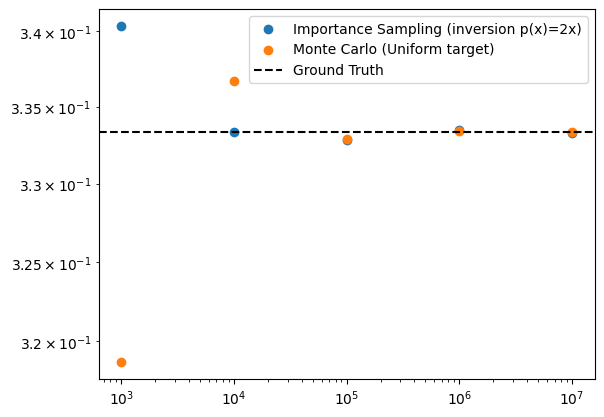

In [91]:
# 3.1 (Uniform Monte Carlo vs. Importance Sampling with inversion)

# --- Uniform Monte Carlo (baseline) ---
# Goal: estimate I = ∫_0^1 f(x) dx when the target density is uniform t(x) = 1 on [0,1].
# Draw X ~ Unif(0,1). By the Law of Large Numbers, the sample mean → expected value as N → ∞:
#     I = ∫_0^1 f(x) t(x) dx = E_t[f(X)]  ≈  (1/N) ∑_{i=1}^N f(X_i),   X_i ~ Unif(0,1).
# This estimator is simple and unbiased. Its variance is:
#     Var(Ī_MC) = (1/N) Var_t(f(X)) = (1/N) [ E_t(f(X)^2) - (E_t[f(X)])^2 ] = (1/N) [E_t(f(X)^2) - I^2] = (1/N) [ ∫_0^1 f(x)^2 dx − I^2] (high variance if f varies a lot over [0,1].)

# --- Importance Sampling (variance reduction) ---
# Idea: sample from a proposal pdf p(x) on [0,1] that places more mass where |f(x)| is large, then reweight to keep the same target integral.
# Let w(x) = t(x)/p(x). Since t(x)=1 on [0,1]:
#     I = ∫ f(x) t(x) dx = ∫ f(x) w(x) p(x) dx = E_{X~p}[ f(X) w(X) ].
# Monte Carlo estimator:
#     Ī_IS = (1/N) ∑ f(X_i) w(X_i),   X_i ~ p.
# Variance (assuming normalized t and p):
#     Var(Ī_IS) = (1/N) [ E_p( (f(X) w(X))^2 ) - I^2 ] = (1/N) [ ∫ f(x)^2 t(x)^2 / p(x) dx - I^2 ] (if p ~ |f| (or |f|·t), typically lower variance than uniform MC)

# --- Inversion Sampling (to draw from nonuniform distribution p(x) on [0,1]) ---
# If U ~ Unif(0,1) and F_p is a CDF with inverse F_p^{-1}, then X = F_p^{-1}(U) has PDF p(x) = dF_p/dx.
# Conversely, given p(x), compute its CDF F_p(x) = ∫_0^x p(t) dt, then invert to get F_p^{-1} (this may be analytical or numerical).

rng = np.random.default_rng(0)  # create a random number generator (seed = 0, so results are same each run)
f = lambda x: x**2  # integrand

def monte_carlo_uniform(f, N, rng):
    # uniform MC: X_i ~ Unif(0,1), estimate I ≈ mean(f(X_i))
    x = rng.random(size=N) # N samples x_i ~ Unif(0,1)
    return f(x).mean() # (1/N) ∑_{i=1}^N f(x_i) = unbiased estimate of ∫_0^1 f(x) dx

def importance_sampling_inversion(f, N, rng):
    # p(x)∝ x → p(x) = 2x on [0,1] with CDF F_p(x) = ∫_0^x f(t) dt = x^2 ⇒ X = √U
    # For this p, w(x) = 1/p(x) = 1/(2x), so each IS term is f(X) / (2X)
    u = rng.random(size=N) # u_i ~ Unif(0,1)
    x = np.sqrt(u) # x_i = √u_i 
    weights = f(x) / (2.0 * x) # f(x_i) * t(x_i)/p(x_i)
    return weights.mean() # (1/N) ∑ f(x_i) w(x_i) = unbiased IS estimate of ∫_0^1 f(x) dx

imp, mc = [], []
ns = [10**k for k in range(3, 8)] # N = 1e3, 1e4, ..., 1e7
for n in ns:
    imp.append(importance_sampling_inversion(f, n, rng))
    mc.append(monte_carlo_uniform(f, n, rng))

ground_truth = 1/3 # ∫_0^1 x^2 dx = 1/3

# Plot: estimates vs N (log-log); both should approach the ground truth line.
plt.scatter(ns, imp, label='Importance Sampling (inversion p(x)=2x)')
plt.scatter(ns, mc, label='Monte Carlo (Uniform target)')
plt.axhline(ground_truth, color='k', linestyle='--', label='Ground Truth')
plt.legend()
plt.yscale('log') # visualize convergence across magnitudes
plt.xscale('log')

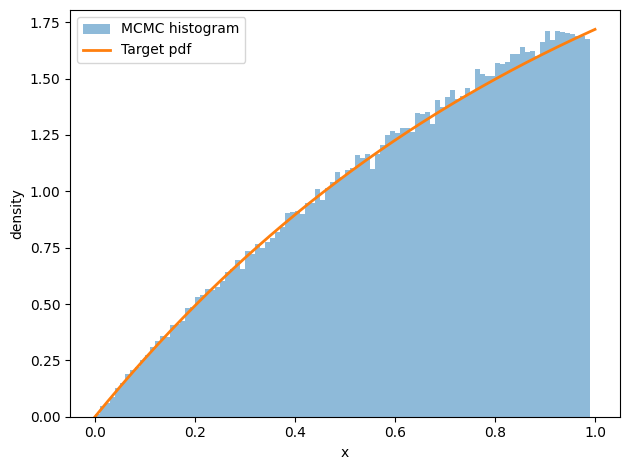

In [86]:
# 3.2.1 (generate nonuniform distribution with Metropolis/Hastings algorithm)

#  --- Metropolis/Hastings Algorithm ---
#  Goal: Generate a Markov chain {x_0, x_1, …, x_T} whose marginal distribution converges to the target distribution p(x) on [a, b]. 
#  (use an unnormalized density \tilde{p}(x) ∝ p(x) because algorithm only uses ratios).

# Initialization:
# 1) Choose an initial distribution μ₀ on [a,b] and draw x₀ ~ μ₀ (ensure \tilde{p}(x₀) > 0).
# 2) Choose a proposal kernel q(·|x): a normalized probability distribution on any subset of ℝ, given the current state x (e.g., Uniform(x-δ, x+δ)). 
#.   q(y|x) = transition probability density of proposing y given current state x
# 3) Set the number of time steps T (and optionally a burn-in and thinning).
#
# Loop (for t = 0,1,2,…,T-1):
# 1) Draw y ~ q(·|x_t) (propose new state y given current state x_t)
# 2) Compute the acceptance ratio
#       α(x_t, y) = min{ 1,[ \tilde{p}(y) / \tilde{p}(x_t) ] * [ q(x_t|y) / q(y|x_t) ] }.
#    For *symmetric* proposals (e.g., Uniform(x±δ), Normal(x, s²)), the Hastings factor q(x_t|y)/q(y|x_t) = 1
#
# 3) Accept/Reject:
#    - If α = 1 (i.e., weight ≥ 1): set x_{t+1} = y. (always accept)
#    - Else if 0 < α < 1 (i.e., 0 < weight < 1): draw r ~ Uniform(0,1).
#         If r ≤ α (i.e., r ≤ weight): set x_{t+1} = y (accept); else x_{t+1} = x_t (reject).
#    - If α = 0 (e.g., y outside support so \tilde{π}(y)=0): set x_{t+1} = x_t.
#
# Convergence (intuition):
#   For large T (after optional discarding first several samples (burning) and keeping every k-th sample (thinning)), the remaining states {x_t} are approximately distributed according to π.
#   (though the {x_t} are correlated, not i.i.d.).
#
# Tips for choosing q(·|x):
# - Support/Reachability: proposals should allow reaching any region where π>0. 
# - Symmetric, simple samplers (Uniform window or Gaussian RW) keep code easy because the q-ratio cancels. 
# - Tune step size (δ or s) to target ~40–60% acceptance in 1D. Too small: slow random walk; too big: many rejections. 
# - Boundaries: proposing on ℝ and auto-rejecting out-of-bounds is simplest; or truncate/renormalize q near edges (then include q-ratio).

delta = 0.1
xmin = 0.
xmax = 1.
rng = np.random.default_rng(0) 

def P(a, x): # unnormalized target distribution \tilde{p}(x) ∝ p(x)
    if(x < xmin or x > xmax):
        return 0.
    return 1.0 - np.exp(-a*x)

def proposal_kernel(x, delta, rng):
    # define proposal kernel q(·|x) = Uniform(x-δ, x+δ) = x + Uniform(-δ, δ) = x + (2*Uniform(0,1)-1)*δ (affine transform: if U ~ U(0,1), Y = a + (b-a)* U ~ Uniform(a,b))
    # choose delta so that for typical states x, most proposals stay within [xmin, xmax] while still being large enough to move the chain efficiently
    u = rng.random() # generate uniform random number in [0,1)
    return x+(2*u-1)*delta 

def metropolis_step(P, a, xold, delta, rng):
    # one Metropolis update: propose → compute weight → accept/reject
    y = proposal_kernel(xold, delta, rng) # draw y ~ q(·|xold)
    weight = P(a, y)/P(a, xold) # Symmetric q ⇒ Hastings factor cancels
    xnew = xold # set xnew = xold by default (reject)
    if(weight >= 1): # Accept always when α=1
        xnew = y
    elif(weight != 0):
        r = rng.random() # Draw r ~ Uniform(0,1)
        if(r <= weight): # Accept with prob. α=weight
            xnew = y
    return xnew

def metropolis(P, a, xtrial, delta, rng, T):
    # Run T steps, returning the full path [x0, x1, ..., xT]
    xs = [xtrial]
    for t in range(T):
        xtrial = metropolis_step(P, a, xtrial, delta, rng)
        xs.append(xtrial)
    return xs

T = 300000 # large number of total steps
burn = 5000 # remove first 5000 samples to allow chain to converge
thin = 1 # no thinning

def target_distribution(P, a, delta, rng, T, burn, thin):
    # Build chain from midpoint, then drop burn-in and apply thinning
    xmid = (xmin+xmax)/2
    xs = metropolis(P, a, xmid, delta, rng, T)
    return np.array(xs[burn:: thin])

a = 1 # choose arbitrary a for demonstration
xs = target_distribution(P, a, delta, rng, T, burn, thin)
# Plot a density histogram: bins span [xmin, xmax] in steps of 0.01; bar height = (count in bin) / (total samples × bin width).
plt.hist(xs,bins=np.arange(xmin, xmax, 0.01), density=True, alpha=0.5, edgecolor='none', label='MCMC histogram') # histogram is plot of samples 
x = np.linspace(0, 1, 400)
Z = 1.0 - (1.0 - np.exp(-a)) / a # normalizing constant on [0,1]
pdf = (1.0 - np.exp(-a * x)) / Z # = P(a, [0,1])
plt.plot(x, pdf, lw=2, label='Target pdf') # plot target pdf, the histogram should approximate this
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.show()

In [82]:
# 3.2.2 (uniform Monte Carlo vs importance sampling)
g = lambda x: np.sqrt(x) # estimate integral I = ∫_0^1 g(x) dx with two methods

def importance_sampling_metropolis(xs, a, g): # importance sampling using samples xs from target distribution P(a,x)
    Z = 1.0 - (1.0 - np.exp(-a)) / a
    tilde = 1.0 - np.exp(-a * xs)
    vals = g(xs) / tilde
    return Z * np.mean(vals)         

print(f'The importance sampling estimate of I is {importance_sampling_metropolis(xs, a, g)}')
print(f'The uniform Monte Carlo estimate of I is {monte_carlo_uniform(g, len(xs))}') # using same number of samples as importance sampling


The importance sampling estimate of I is 0.6665117761962335
The uniform Monte Carlo estimate of I is 0.666217297627821


In [84]:
# 3.2.3 (find a that minimizes variance of importance sampling estimator numerically)
def min_a():
    a_values = np.logspace(-2, 2, 100)  # generate 100 a values from 0.01 to 100
    variances = []
    for a in a_values:
        var = importance_sampling_metropolis(xs, a, g)
        variances.append(var)
    return a_values[np.argmin(variances)]

print(f'The value of a that minimizes the variance of the importance sampling estimator is approximately {min_a()}')

The value of a that minimizes the variance of the importance sampling estimator is approximately 1.8307382802953698


In [ ]:
# 4.1 (finite difference method for 2d Schrödinger equation)
def coordinate_grid(lx, ly, lt, nx, ny, nt):
    xs = np.linspace(-lx, lx, nx) # nx x points, includes -lx and lx
    ys = np.linspace(-ly, ly, ny) # ny y points, includes -ly and ly
    ts = np.linspace(0.0, lt, nt) # nt t points, includes 0 and lt
    return xs, ys, ts

def solve_2D_schrödinger_eq(xs, ys, ts, x0, y0, sigx, sigy, kx, ky, V): # solve 2D Schrödinger equation with finite difference method (V = V(x,y,t) = potential)
    nx, ny, nt = len(xs), len(ys), len(ts)
    dx, dy, dt = xs[1] - xs[0], ys[1] - ys[0], ts[1] - ts[0]  
    r_x, r_y = dt/dx**2, dt/dy**2  # finite difference coefficients
    
    # psi = psi(x,y,t), so, for any time slice t, y-axis corresponds to rows (y increases downwards), x-axis corresponds to columns (x increases rightwards)
    # psi_r[j,i,k] = psi_r(x_i, y_j, t_k) and psi_i[j,i,k] = psi_i(x_i, y_j, t_k) with j,i,k = 0,...,ny-1,nx-1,nt-1 as indices for y,x,t respectively
    psi_r = np.zeros(shape=(ny, nx, nt))
    psi_i = np.zeros(shape=(ny, nx, nt))

    # np.meshgrid takes 1D coordinate arrays (xs, ys) and returns 2D grids (X, Y)
    # with indexing='xy' (Cartesian plotting convention):
    #   - shapes: X.shape == Y.shape == (ny, nx)
    #   - rows correspond to y (moving downwards), columns to x (moving rightwards)
    #   - X[j, i] = xs[i] (each row repeats xs)
    #   - Y[j, i] = ys[j] (each column repeats ys)
    #
    # with indexing='ij' (matrix/index convention):
    #   - shapes: X.shape == Y.shape == (nx, ny)
    #   - rows correspond to x (moving downwards), columns to y (moving rightwards)
    #   - X[i, j] = xs[i] (each column repeats xs)
    #   - Y[i, j] = ys[j] (each row repeats ys)
    X, Y = np.meshgrid(xs,ys, indexing='xy') 

    # initial condition: Gaussian wave packet centered at (x0, y0) with widths (sigx, sigy) and wavevector (kx, ky)
    A = 1.0 / np.sqrt(2.0*np.pi*sigx*sigy) # normalization constant for 2D Gaussian
    # psi(j,i,0) = psi(x_i,y_j,0), and X[j,i] = xs[i], Y[j,i] = ys[j] so indices and coordinates match up
    psi_r[:,:,0] = A * np.exp(-((X-x0)**2/(4*sigx**2) + (Y-y0)**2/(4*sigy**2)))*np.cos(kx*(X-x0) + ky*(Y-y0)) 
    psi_i[:,:,0] = A * np.exp(-((X-x0)**2/(4*sigx**2) + (Y-y0)**2/(4*sigy**2)))*np.sin(kx*(X-x0) + ky*(Y-y0))

    # Dirichlet boundary conditions: psi = 0 at edges for all times (psi --> 0 as r --> ∞ (assume box is large enough))
    psi_r[0,:,:] = 0  # psi_r(y = 0)
    psi_r[-1,:,:] = 0  # psi_r(y = ly)
    psi_r[:,0,:] = 0  # psi_r(x = 0)
    psi_r[:,-1,:] = 0  # psi_r(x = lx)

    psi_i[0,:,:] = 0
    psi_i[-1,:,:] = 0
    psi_i[:,0,:] = 0
    psi_i[:,-1,:] = 0

    # FTCS scheme for time-dependent 2D Schrödinger equation (ℏ =  1, m = 1/2) : i ∂_t ψ(x, y, t) = H ψ(x, y, t),  with  H = -Δ + V(x, y, t),   Δ = ∂_xx + ∂_yy
    # ---------------------------------------------------------------------------------------------------------------------------------------------------------
    # goal: compute time step t_k -> t_{k+1} for k = 0,..., nt-2 at interior spatial points x_i, y_j for i,j = 1,..., nx-2, ny-2 (since ψ at boundaries already known)
    #
    # approximate ∂_t ψ at (x_i, y_j, t_k) using *forward* difference in time:
    #   ∂_t ψ(x_i, y_j, t_k) ≈ ∂_t ψ(x_i, y_j, t_k) ≈ [ ψ(x_i, y_j, t_{k+1}) − ψ(x_i, y_j, t_k) ] / Δt
    #   -->
    #   [ ψ(x_i, y_j, t_{k+1}) − ψ(x_i, y_j, t_k) ] / Δt ≈ − i H ψ(x_i, y_j, t_k)                        
    #
    # approximate Laplacian at (x_i, y_j, t_k) using second-order *central* difference in space (denote this discrete Laplacian operator as Δ_h):
    #   Δψ(x_i,y_j,t_k) ≈ [ψ(x_{i+1}, y_j, t_k) - 2 ψ(x_i, y_j, t_k) + ψ(x_{i-1},y_j,t_k)] / Δx^2 + [ψ(x_i, y_{j+1}, t_k) - 2 ψ(x_i, y_j, t_k) + ψ(x_i,y_{j-1},t_k)] / Δy^2
    #   
    # substitute approximations into H = - Δ + V and rearrange to solve for ψ(x_i, y_j, t_{k+1}):
    #   ψ(x_i, y_j, t_{k+1}) ≈ ψ(x_i, y_j, t_k) - i Δt [ - Δ_h ψ(x_i, y_j, t_k) + V(x_i, y_j, t_k) ψ(x_i, y_j, t_k) ]
    #
    # real/imaginary split: ψ = R + i I, with R(x_i,y_j,t_k) = Re ψ(x_i,y_j,t_k), I(x_i,y_j,t_k) = Im ψ(x_i,y_j,t_k)
    # -->
    #   R(x_i, y_j, t_{k+1}) ≈ R(x_i, y_j, t_k) - dt ( Δ_h I(x_i, y_j, t_k) - V(x_i, y_j, t_k) I(x_i, y_j, t_k) )
    #   I(x_i, y_j, t_{k+1}) ≈ I(x_i, y_j, t_k) + dt ( Δ_h R(x_i, y_j, t_k) - V(x_i, y_j, t_k) R(x_i, y_j, t_k) )
    # -->
    #   R[j,i,k+1] ≈ R[j,i,k] - r_x*(I[j,i+1,k] - 2*I[j,i,k] + I[j,i-1,k]) - r_y*(I[j+1,i,k] - 2*I[j,i,k] + I[j-1,i,k]) + dt*V[j,i,k]*I[j,i,k]
    #   I[j,i,k+1] ≈ I[j,i,k] + r_x*(R[j,i+1,k] - 2*R[j,i,k] + R[j,i-1,k]) + r_y*(R[j+1,i,k] - 2*R[j,i,k] + R[j-1,i,k]) - dt*V[j,i,k]*R[j,i,k]
    #
    # probability (norm) remark:
    #   exact step (unitary):
    #     ψ(k+1) = U(Δt) ψ(k),  with  U(Δt) = exp(−i H Δt),  U†U = I  --> discrete probability |ψ(k)|^2 = ∑_{i,j} |ψ{j,i,k}|^2 Δx Δy is constant in k (= 1 if normalized)
    #
    #   FTCS approximate step:
    #     ψ(k+1) ≈ (1 - i Δt H) ψ(k) = ψ(k) - i Δt H ψ(k) --> [ ψ(k+1) - ψ(k) ]/ Δt ≈ - i H ψ(k) (same as above)
    #     not unitary: the step operator I − i Δt H is not unitary, so discrete norm/probability drifts over time: 
    #     |ψ(k+1)|^2 = <ψ(k+1), ψ(k+1)> ≈ <(I - i Δt H) ψ(k), (I - i Δt H) ψ(k)> = <ψ(k), (I + i Δt H)(I - i Δt H) ψ(k)> = <ψ(k), (I + (Δt)^2 H^2) ψ(k)> 
    #                = |ψ(k)|^2 + (Δt)^2 <ψ(k), H^2 ψ(k)>  = |ψ(k)|^2 + O((Δt)^2)
    #     so discrete probability drifts by O((Δt)^2) each step, and thus by O(Δt) over finite time intervals (# of steps = lt/Δt) 
    #     however, since we take very small Δt, this drift is negligible over the full time scale (approximately unitary behavior observed in practice)
    #
    # vectorized numpy implementation (no explicit loops):
    # LHS uses time slice 1:    psi_[..., 1:]   → updates k + 1 = 1...nt-1
    # RHS uses previous time:   psi_[..., :-1]  → reads   k   = 0...nt-2
    # spatial neighbors align by shifting indices:  
    #   center (interior):   [1:-1, 1:-1, :-1]   → (j,   i,   k)
    #   x-right neighbor:    [1:-1, 2:  , :-1]   → (j,   i+1, k)
    #   x-left  neighbor:    [1:-1, :-2, :-1]   → (j,   i-1, k)
    #   y-up    neighbor:    [2:  , 1:-1, :-1]   → (j+1, i,   k)
    #   y-down  neighbor:    [:-2, 1:-1, :-1]   → (j-1, i,   k)
    # all slices share the same shape (ny-2, nx-2, nt-1), so numpy updates every (j,i,k) triplet elementwise
    
    psi_r[1:-1, 1:-1, 1:] = (
        psi_r[1:-1, 1:-1, :-1]
        - r_x*(psi_i[1:-1, 2: , :-1] - 2*psi_i[1:-1, 1:-1, :-1] + psi_i[1:-1, :-2, :-1])  # x-second-diff
        - r_y*(psi_i[2: , 1:-1, :-1] - 2*psi_i[1:-1, 1:-1, :-1] + psi_i[:-2, 1:-1, :-1])  # y-second-diff
        + dt*V[1:-1, 1:-1, :-1] * psi_i[1:-1, 1:-1, :-1]  
    )
    psi_i[1:-1, 1:-1, 1:] = (
        psi_i[1:-1, 1:-1, :-1]
        + r_x*(psi_r[1:-1, 2: , :-1] - 2*psi_r[1:-1, 1:-1, :-1] + psi_r[1:-1, :-2, :-1])
        + r_y*(psi_r[2: , 1:-1, :-1] - 2*psi_r[1:-1, 1:-1, :-1] + psi_r[:-2, 1:-1, :-1])
        - dt*V[1:-1, 1:-1, :-1] * psi_r[1:-1, 1:-1, :-1]
    )
    return psi_r, psi_i

lx = ly = 50
ly = 50
lt = 200
nx = ny = 101 # dx = lx/(nx-1) = 1.0/(101-1) = 0.01
nt = 10001 # dt = lt/(nt-1) = 10.0/(10001-1) = 0.001, so r = dt/dx = 0.1 <= 1.0 (CFL condition satisfied)
x0, y0 = 0.5, 0
sigx = sigy = 0.5**2
kx = 0
ky = k0 = np.pi * 10
C = 10

xs, ys, ts = coordinate_grid(lx, ly, lt, nx, ny, nt)

def potential(xs, ys, C):
    XX, YY, TT = np.meshgrid(xs, ys, ts, indexing='ij')  # XX.shape == (nx, ny)
    mask = (XX**2 + YY**2 > 1)
    V = np.where(mask, C, 0.0)
    return V

V = potential(xs,ys,C)
print(V)

psi_r, psi_i = solve_2D_schrödinger_eq(xs,ys,ts, x0, y0, sigx, sigy, kx, ky, V)
dens = psi_r**2 + psi_i**2

X,Y = np.meshgrid(xs,ys)
plt.contourf(X,Y, dens[:,:,100])




[[[10. 10. 10. ... 10. 10. 10.]
  [10. 10. 10. ... 10. 10. 10.]
  [10. 10. 10. ... 10. 10. 10.]
  ...
  [10. 10. 10. ... 10. 10. 10.]
  [10. 10. 10. ... 10. 10. 10.]
  [10. 10. 10. ... 10. 10. 10.]]

 [[10. 10. 10. ... 10. 10. 10.]
  [10. 10. 10. ... 10. 10. 10.]
  [10. 10. 10. ... 10. 10. 10.]
  ...
  [10. 10. 10. ... 10. 10. 10.]
  [10. 10. 10. ... 10. 10. 10.]
  [10. 10. 10. ... 10. 10. 10.]]

 [[10. 10. 10. ... 10. 10. 10.]
  [10. 10. 10. ... 10. 10. 10.]
  [10. 10. 10. ... 10. 10. 10.]
  ...
  [10. 10. 10. ... 10. 10. 10.]
  [10. 10. 10. ... 10. 10. 10.]
  [10. 10. 10. ... 10. 10. 10.]]

 ...

 [[10. 10. 10. ... 10. 10. 10.]
  [10. 10. 10. ... 10. 10. 10.]
  [10. 10. 10. ... 10. 10. 10.]
  ...
  [10. 10. 10. ... 10. 10. 10.]
  [10. 10. 10. ... 10. 10. 10.]
  [10. 10. 10. ... 10. 10. 10.]]

 [[10. 10. 10. ... 10. 10. 10.]
  [10. 10. 10. ... 10. 10. 10.]
  [10. 10. 10. ... 10. 10. 10.]
  ...
  [10. 10. 10. ... 10. 10. 10.]
  [10. 10. 10. ... 10. 10. 10.]
  [10. 10. 10. ... 10. 10. 1

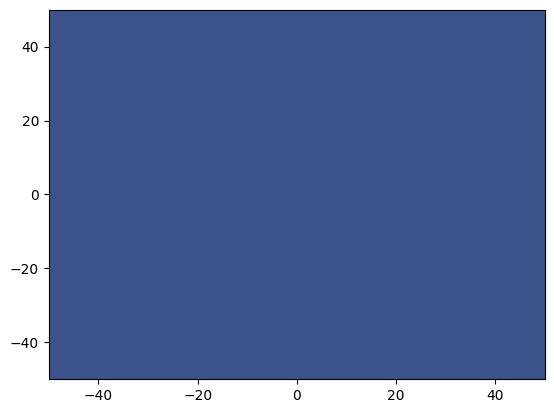

In [ ]:
# 4.2 (transmission coefficient in terms of C)




In [ ]:
# 4.3 (3D meshgrid with 'ijk' ordering — use numpy's 'ij' indexing)
# Create 1D coordinate arrays for x, y, z and construct a 3D grid with index ordering (i,j,k)
xs = np.linspace(-1, 1, 5)
ys = np.linspace(-2, 2, 7)
zs = np.linspace(0, 1, 4)

# Use indexing='ij' to get arrays shaped (len(xs), len(ys), len(zs)) — which corresponds to 'ijk' ordering
X3, Y3, Z3 = np.meshgrid(xs, ys, zs, indexing='ij')

print('X3.shape, Y3.shape, Z3.shape =', X3.shape, Y3.shape, Z3.shape)

# Example: value at grid index (i=2, j=3, k=1)
i, j, k = 2, 3, 1
print(f'Grid point (i={i}, j={j}, k={k}) -> (x, y, z) = ({X3[i,j,k]}, {Y3[i,j,k]}, {Z3[i,j,k]})')

# If you need a stacked array with coordinates as last dimension, use np.stack with axis=3
XYZ_stack = np.stack((X3, Y3, Z3), axis=3)
print('XYZ_stack.shape =', XYZ_stack.shape)

# Small sanity check: assert that X3 varies along axis 0 only, Y3 along axis 1 only, Z3 along axis 2 only
assert np.all(X3[:,0,0] == xs)
assert np.all(Y3[0,:,0] == ys)
assert np.all(Z3[0,0,:] == zs)
print('Sanity checks passed: indexing="ij" produces ijk ordering')